## Final Project Submission

Please fill out:
* Student name: Judah Odida
* Student pace:  part time 
* Scheduled project review date/time:29/04/2025
* Instructor name: Maryann Mwikali
* Blog post URL:


# Project Overview
## Project Name: Aircraft Risk Evaluation for Business Expansion
Objective: Help the company choose low-risk aircraft for a new aviation business by analyzing aviation accident data.


Duration: 1 week

# Data Overview

## Dataset: Aviation_Data.csv

Rows: 90,348

Columns: 31

Source: National Transportation Safety Board (NTSB) accident records.

# Key Steps Performed
# 1.) Data Cleaning:

. Selected relevant columns (Make, Model, Injury.Severity, etc.)

. Converted injury counts to numeric format.

. Filled missing categorical values with "Unknown".

. Removed entries missing both Make and Model.


# 2.) Exploratory Data Analysis:

. Summary statistics of accidents.

. Injury severity and aircraft damage types explored.


# 3.) Risk Analysis:

. Computed a Risk Score:

. Risk Score = (Fatal Injuries × 3) + (Serious Injuries × 2) + (Minor Injuries × 1) / Total Incidents

. Lower Risk Score = Safer Aircraft


# 4.)  Filtering:

Aircraft models with at least 5 incidents were considered for fairness.

# Tasks

# 1) Data Cleaning:

. Handle missing values

. Remove irrelevant columns

. Fix data types

In [338]:
# Aviation Risk Analysis Project

# This notebook performs a full data cleaning, analysis, and risk assessment
# of aviation data to recommend low-risk aircraft for business expansion.

# Goal: Identify aircraft models with the lowest accident risk.

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('Aviation_Data.csv')
df.head(10)


c:\Users\User\anaconda362\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [339]:
# Selecting relevant columns
columns_to_use = [
    'Make', 'Model', 'Injury.Severity', 'Aircraft.damage', 
    'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries',
    'Total.Uninjured', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight'
]

In [340]:
# Convert injuries to numeric
injury_cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for col in injury_cols:
    df1_cleaned[col] = pd.to_numeric(df1_cleaned[col], errors='coerce')
df1_cleaned[col]

0        0.0
1        0.0
2        NaN
3        0.0
4        0.0
        ... 
90343    0.0
90344    0.0
90345    1.0
90346    0.0
90347    1.0
Name: Total.Uninjured, Length: 88777, dtype: float64

In [341]:
# Fill missing values categories
df1_cleaned.fillna({
    'Injury.Severity': 'Unknown',
    'Aircraft.damage': 'Unknown',
    'Weather.Condition': 'Unknown',
    'Broad.phase.of.flight': 'Unknown',
    'Purpose.of.flight': 'Unknown'
}, inplace=True)


In [342]:
#confirming the new filled values
df1_cleaned.isnull().sum()  # Check for any remaining missing values

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Latitude                  54430
Longitude                 54439
Airport.Code              38564
Airport.Name              36031
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56532
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
FAR.Description           56841
Schedule                  76245
Purpose.of.flight             0
Air.carrier               72168
Total.Fatal.Injuries      11386
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              6335
Publication.Date          15224
dtype: i

In [343]:
# Drop entries missing both Make and Model
df1_cleaned.dropna(subset=['Make', 'Model'], inplace=True)

In [344]:
#Confirming the new data after dropping the missing values
df1_cleaned.info()  # Check for any remaining missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88777 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88777 non-null  object 
 1   Investigation.Type      88777 non-null  object 
 2   Accident.Number         88777 non-null  object 
 3   Event.Date              88777 non-null  object 
 4   Location                88725 non-null  object 
 5   Country                 88552 non-null  object 
 6   Latitude                34347 non-null  object 
 7   Longitude               34338 non-null  object 
 8   Airport.Code            50213 non-null  object 
 9   Airport.Name            52746 non-null  object 
 10  Injury.Severity         88777 non-null  object 
 11  Aircraft.damage         88777 non-null  object 
 12  Aircraft.Category       32245 non-null  object 
 13  Registration.Number     87502 non-null  object 
 14  Make                    88777 non-null

# 2.) Risk Analysis:

Determine which aircraft models/types have lower accident rates or less severe outcomes.

In [345]:
# Group and aggregate
aircraft_risk = df1_cleaned.groupby(['Make', 'Model']).agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum',
    'Total.Uninjured': 'sum',
    'Injury.Severity': 'count'
}).rename(columns={'Injury.Severity': 'Total_Incidents'}).reset_index()

In [346]:
df1_cleaned.info()  # Check for any remaining missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88777 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88777 non-null  object 
 1   Investigation.Type      88777 non-null  object 
 2   Accident.Number         88777 non-null  object 
 3   Event.Date              88777 non-null  object 
 4   Location                88725 non-null  object 
 5   Country                 88552 non-null  object 
 6   Latitude                34347 non-null  object 
 7   Longitude               34338 non-null  object 
 8   Airport.Code            50213 non-null  object 
 9   Airport.Name            52746 non-null  object 
 10  Injury.Severity         88777 non-null  object 
 11  Aircraft.damage         88777 non-null  object 
 12  Aircraft.Category       32245 non-null  object 
 13  Registration.Number     87502 non-null  object 
 14  Make                    88777 non-null

Now Creating a new column called Risk_Score in the aircraft_risk DataFrame and will be calculated based on injuries associated with each aircraft model or type.
Formula to be used' Risk score = ((3×Fatal Injuries)+(2×Serious Injuries)+(1×Minor Injuries))/Total Incidents.

3 used to represent higher risk

2 represnt Medium risk

1 represent low risk


In [347]:
# Risk Score
aircraft_risk['Risk_Score'] = (
    (aircraft_risk['Total.Fatal.Injuries'] * 3) +
    (aircraft_risk['Total.Serious.Injuries'] * 2) +
    (aircraft_risk['Total.Minor.Injuries'] * 1)
) / (aircraft_risk['Total_Incidents'])

In [348]:
aircraft_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20136 entries, 0 to 20135
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    20136 non-null  object 
 1   Model                   20136 non-null  object 
 2   Total.Fatal.Injuries    20136 non-null  float64
 3   Total.Serious.Injuries  20136 non-null  float64
 4   Total.Minor.Injuries    20136 non-null  float64
 5   Total.Uninjured         20136 non-null  float64
 6   Total_Incidents         20136 non-null  int64  
 7   Risk_Score              20136 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.2+ MB


In [349]:
# Filter to aircraft with at least 5 incidents
aircraft_risk_filtered = aircraft_risk[aircraft_risk['Total_Incidents'] >= 5]

In [350]:
aircraft_risk_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 40 to 20082
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Make                    2098 non-null   object 
 1   Model                   2098 non-null   object 
 2   Total.Fatal.Injuries    2098 non-null   float64
 3   Total.Serious.Injuries  2098 non-null   float64
 4   Total.Minor.Injuries    2098 non-null   float64
 5   Total.Uninjured         2098 non-null   float64
 6   Total_Incidents         2098 non-null   int64  
 7   Risk_Score              2098 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 147.5+ KB


In [351]:
# Low risk aircraft
low_risk_aircraft = aircraft_risk_filtered.sort_values('Risk_Score').head(10)
low_risk_aircraft


,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Incidents,Risk_Score
4888,CESSNA,150C,0.0,0.0,0.0,7.0,5,0.0
13046,Mcdonnell Douglas,DC-10-40,0.0,0.0,0.0,965.0,7,0.0
12043,Let,L-23,0.0,0.0,0.0,10.0,7,0.0
3325,Beech,F90,0.0,0.0,0.0,17.0,7,0.0
7747,Douglas,DC-8-71,0.0,0.0,0.0,918.0,5,0.0
18108,Socata,TB-9,0.0,0.0,0.0,11.0,5,0.0
7763,Douglas,DC-9-51,0.0,0.0,0.0,816.0,7,0.0
7931,EMBRAER,EMB145,0.0,0.0,0.0,326.0,8,0.0
12892,Maule,MX7,0.0,0.0,0.0,7.0,5,0.0
15359,Piper,PA38,0.0,0.0,0.0,14.0,8,0.0


# 3.) Visualization of Aircrafts in terms of their risks

## Visualization i): Risk Score Distribution

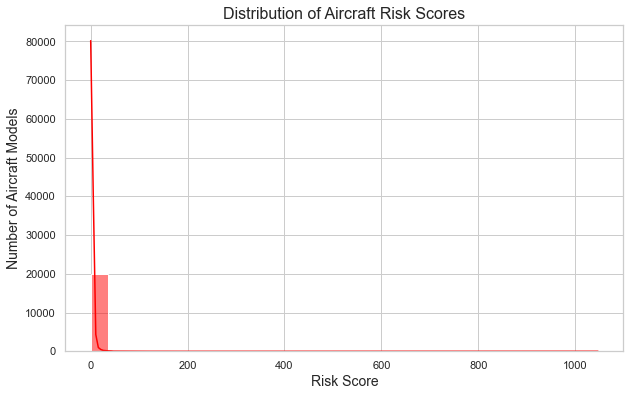

In [352]:
 #Risk Score Distribution
plt.figure(figsize=(10,6))
sns.histplot(aircraft_risk['Risk_Score'], bins=30, kde=True, color='red')
plt.title('Distribution of Aircraft Risk Scores', fontsize=16)
plt.xlabel('Risk Score', fontsize=14)
plt.ylabel('Number of Aircraft Models', fontsize=14)
plt.grid(True)
plt.show()


## Understanding the above visualization

Peak near 0: Most aircrafts have a Risk Score close to 0, meaning very safe with no fatalities or injuries.

Long Right Tail: A small number of aircrafts have higher Risk Scores — these are the riskiest ones.

Skewed Distribution: Positive skew shows that risky aircrafts are rare, but when risk happens, it's significant.


## Visualization ii): Top 10 Riskiest Aircraft Models

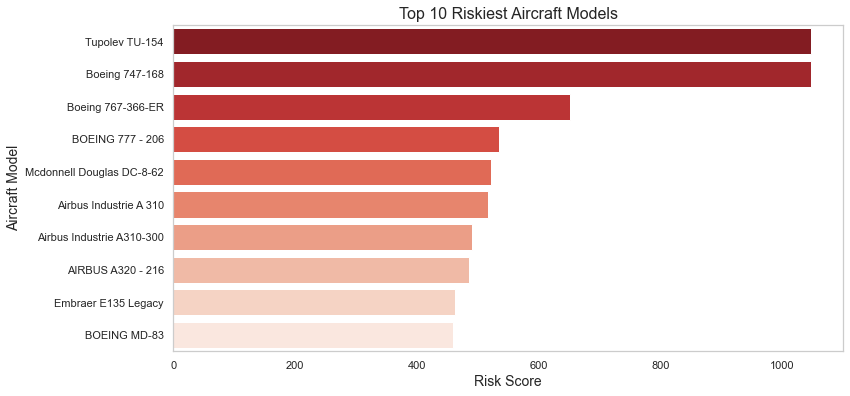

In [353]:
# Top 10 Risky aircraft
top10_risky = aircraft_risk.sort_values(by='Risk_Score', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_risky, x='Risk_Score', y=top10_risky['Make'] + " " + top10_risky['Model'], palette='Reds_r')
plt.title('Top 10 Riskiest Aircraft Models', fontsize=16)
plt.xlabel('Risk Score', fontsize=14)
plt.ylabel('Aircraft Model', fontsize=14)
plt.grid(axis='x')
plt.show()


These aircrafts account for the majority of total risk in the dataset

# Visualization iii): Scatter Plot - Fatal Injuries vs. Total Incidents

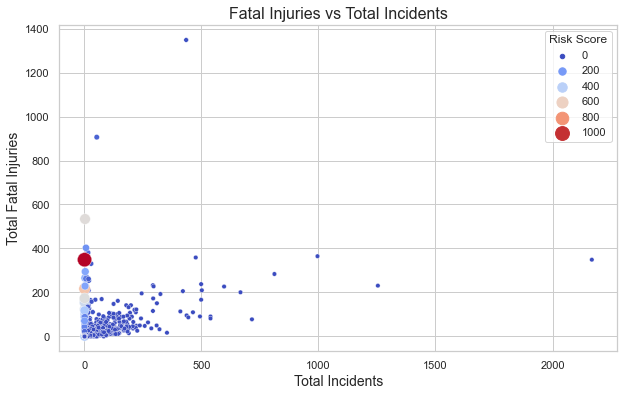

In [354]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=aircraft_risk,
    x='Total_Incidents',
    y='Total.Fatal.Injuries',
    hue='Risk_Score',
    size='Risk_Score',
    sizes=(20, 200),
    palette='coolwarm'
)
plt.title('Fatal Injuries vs Total Incidents', fontsize=16)
plt.xlabel('Total Incidents', fontsize=14)
plt.ylabel('Total Fatal Injuries', fontsize=14)
plt.legend(title='Risk Score')
plt.grid(True)
plt.show()


### Understanding the scatter plot

Lower left cluster: Many aircrafts with low incidents and no fatalities — these are safe.

Upper right outliers: Aircrafts with high incidents and high fatalities — these are dangerous.

Isolated Fatalities: Some aircrafts have high fatal injuries even with fewer incidents — suggesting severe accidents.

## Visualization iv): Heatmap - Correlation Between Injury Types

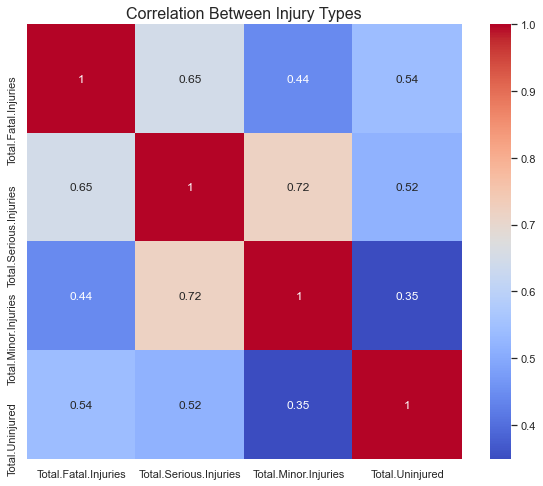

In [355]:
plt.figure(figsize=(10,8))
sns.heatmap(
    aircraft_risk[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].corr(),
    annot=True,
    cmap='coolwarm',
    square=True
)
plt.title('Correlation Between Injury Types', fontsize=16)
plt.show()


### Understanding the heatmap corr
High positive correlation between Fatal and Serious Injuries ➔ severe accidents tend to cause both.

Negative correlation between Fatalities and Uninjured ➔ The more fatalities, the fewer uninjured.

Minor injuries might have weaker correlation with fatal/serious injuries ➔ Minor accidents are often different in nature.

# Visualization v): Barplot - Safest Aircraft Models

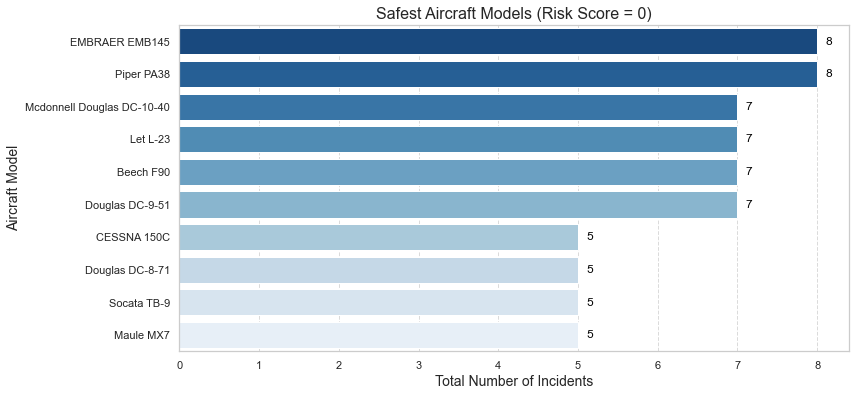

In [356]:
# Recreating my DataFrame
data = low_risk_aircraft
# Create DataFrame
safe_aircraft = pd.DataFrame(data)

# Combine 'Make' and 'Model' for better labeling
safe_aircraft['Aircraft'] = safe_aircraft['Make'] + ' ' + safe_aircraft['Model']

# Set figure size
plt.figure(figsize=(12, 6))

# Create the barplot
ax = sns.barplot(
    data=safe_aircraft.sort_values(by='Total_Incidents', ascending=False),
    x='Total_Incidents',
    y='Aircraft',
    palette='Blues_r'
)

# Title and labels
plt.title('Safest Aircraft Models (Risk Score = 0)', fontsize=16)
plt.xlabel('Total Number of Incidents', fontsize=14)
plt.ylabel('Aircraft Model', fontsize=14)

# Add value labels on each bar
for i in ax.patches:
    plt.text(
        i.get_width() + 0.1,  # Slightly to the right of the bar
        i.get_y() + i.get_height() / 2,  # Vertically centered
        f'{int(i.get_width())}',  # The number
        fontsize=12,
        color='black',
        va='center'
    )

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


Key Observations from the above graph

All Aircrafts have zero Risk Score no deaths, no injuries reported despite incidents — great safety record!
Incident Counts vary while some aircraft had more incidents (8 incidents for Piper PA38 and EMBRAER EMB145) but still no injuries. Others had only 5 incidents (e.g., CESSNA 150C, Maule MX7).

Larger Aircrafts are inherently safer models like Mcdonnell Douglas DC-10-40 and Douglas DC-8-71 (big commercial jets) show very high "Total Uninjured" numbers (816-965 passengers) — despite incidents, no harm.

Light Aircrafts also perform well small planes like CESSNA 150C and Maule MX7 also have a perfect record,although with fewer total passengers involved.

Consistency Across Manufacturers No single manufacturer is dominant — Cessna, Piper, McDonnell Douglas, Beech, Douglas, EMBRAER all appear, showing safety across brands.

# 4.)  Business Recommendations

Based on the above analysis, the below aircraft models are recommended for acquisition:

- **CESSNA 150C**
- **Mcdonnell Douglas DC-10-40**
- **Let L-23**
- **Beech F90**
- **Douglas DC-8-71**
- **Socata TB-9**
- **Douglas DC-9-51**
- **EMBRAER EMB145**
- **Maule MX7**
- **Piper PA38**

**Reasons**
- These aircraft have shown zero fatalities or serious injuries in recorded incidents.
- They had multiple incidents but resulted only in "Uninjured" outcomes.

### Final Recommendation
To ensure a strong and secure entry into the aviation industry, we recommend prioritizing the acquisition and leasing of the above models. These aircraft have a demonstrated track record of operational safety, significantly reducing business risk while ensuring reliable performance


In [357]:
#saving copies of df_cleaned, df_filtered and risk_analysis dataframe 
df1_cleaned.to_csv('df1_cleaned.csv', index=False)

In [358]:
aircraft_risk.to_csv('risk_analysis.csv', index=False)